In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='Walker2d-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
print(df_comper.shape)

(5070, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(12301, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-09-2023 22:46:09,28,0,28,0.001392,1,29,True,1.583685,1.583685,1.583685,1.583685,1.583685,COMPER
1,1,2,Walker2d-v4,25-09-2023 22:46:42,44,0,44,0.002187,2,17,True,-10.873248,-4.644782,-4.644782,-4.644782,-4.644782,COMPER
2,1,3,Walker2d-v4,25-09-2023 22:47:52,72,0,72,0.003579,3,29,True,-7.205723,-5.498429,-5.498429,-5.498429,-5.498429,COMPER
3,1,4,Walker2d-v4,25-09-2023 22:50:30,135,0,135,0.006710,4,64,True,-4.107693,-5.150745,-5.150745,-5.150745,-5.150745,COMPER
4,1,5,Walker2d-v4,25-09-2023 22:52:17,177,0,177,0.008798,5,43,True,2.905206,-3.539555,-3.539555,-3.539555,-3.539555,COMPER


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,04-10-2023 14:49:39,22,23,0,0.001093,1,23,True,9.695140,9.695140,9.695140,9.695140,9.695140,DDPG
1,1,2,Walker2d-v4,04-10-2023 14:49:41,34,35,0,0.001690,2,13,True,-0.307138,4.694001,4.694001,4.694001,4.694001,DDPG
2,1,3,Walker2d-v4,04-10-2023 14:49:42,47,48,0,0.002336,3,14,True,-2.932277,2.151908,2.151908,2.151908,2.151908,DDPG
3,1,4,Walker2d-v4,04-10-2023 14:49:44,59,60,0,0.002933,4,13,True,-1.289959,1.291441,1.291441,1.291441,1.291441,DDPG
4,1,5,Walker2d-v4,04-10-2023 14:49:45,70,71,0,0.003479,5,12,True,-0.337276,0.965698,0.965698,0.965698,0.965698,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-09-2023 22:46:09,28,0,28,0.001392,1,29,True,1.583685,1.583685,1.583685,1.583685,1.583685,COMPER
1,1,2,Walker2d-v4,25-09-2023 22:46:42,44,0,44,0.002187,2,17,True,-10.873248,-4.644782,-4.644782,-4.644782,-4.644782,COMPER
2,1,3,Walker2d-v4,25-09-2023 22:47:52,72,0,72,0.003579,3,29,True,-7.205723,-5.498429,-5.498429,-5.498429,-5.498429,COMPER
3,1,4,Walker2d-v4,25-09-2023 22:50:30,135,0,135,0.006710,4,64,True,-4.107693,-5.150745,-5.150745,-5.150745,-5.150745,COMPER
4,1,5,Walker2d-v4,25-09-2023 22:52:17,177,0,177,0.008798,5,43,True,2.905206,-3.539555,-3.539555,-3.539555,-3.539555,COMPER


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
1755,5,1756,Walker2d-v4,05-10-2023 02:37:35,49762,45760,0,0.999,1512,272,True,190.398313,27.305365,134.341605,113.372697,191.639248,DDPG
1756,5,1757,Walker2d-v4,05-10-2023 02:37:44,49800,45798,0,0.999,1513,39,False,35.122091,27.309814,134.198368,113.892070,193.593716,DDPG
1757,5,1758,Walker2d-v4,05-10-2023 02:38:17,49952,45950,0,0.999,1513,191,True,106.943760,27.355112,131.757721,114.741076,194.299337,DDPG
1758,5,1759,Walker2d-v4,05-10-2023 02:38:27,50000,45987,0,0.999,1514,49,True,51.658197,27.368929,131.403891,114.524849,184.345553,DDPG
1759,5,1760,Walker2d-v4,05-10-2023 02:38:28,50001,45988,0,0.999,1515,2,True,1.250107,27.354088,128.241101,107.238792,158.024460,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

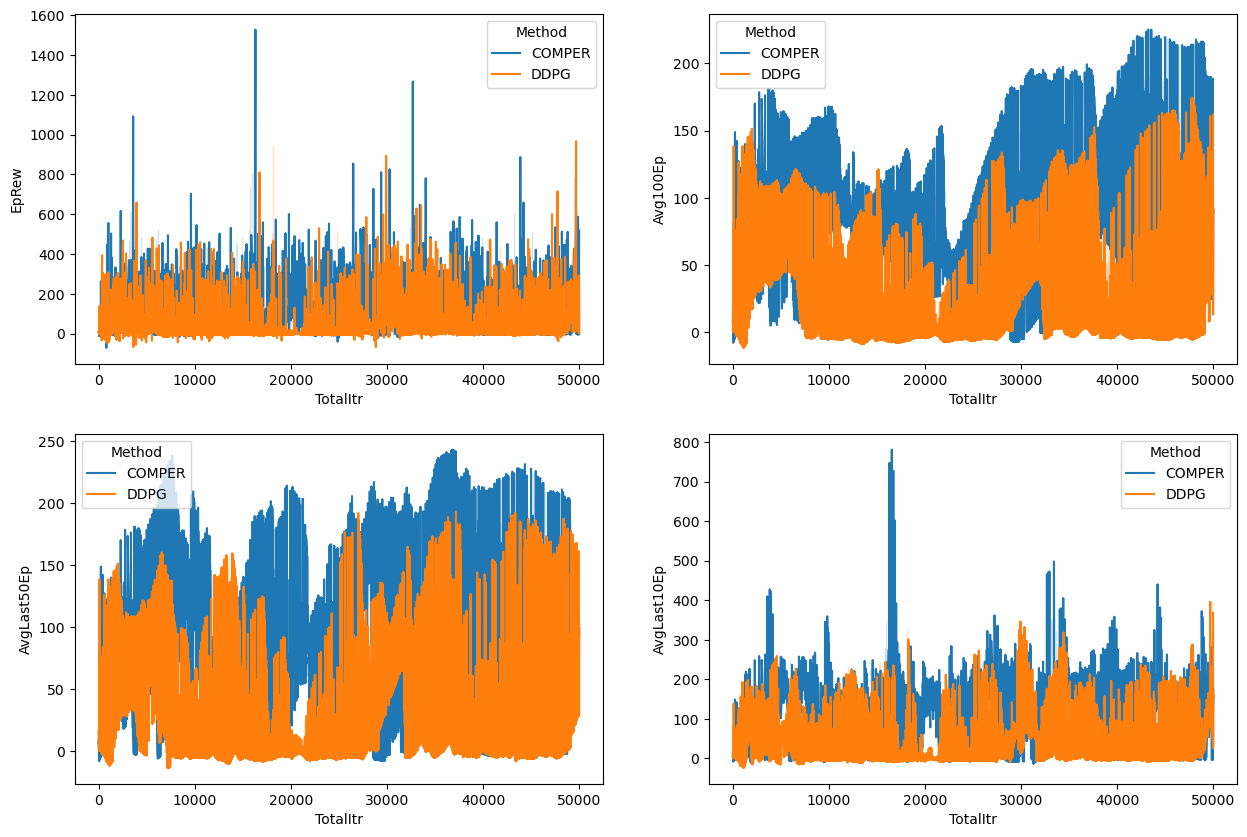

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [9]:
path ='COMPER_DDPG/data_using_done'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
print(df_comper_eval.shape)
df_comper_eval.head()

FileNotFoundError: File COMPER_DDPG/data_using_doneWalker2d-v4/eval/progress.json does not exist

In [ ]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,20-07-2023 00:55:46,Walker2d-v4,5000,1.059690,DDPG
1,1,20-07-2023 01:03:41,Walker2d-v4,10000,2.544492,DDPG
2,1,20-07-2023 01:11:57,Walker2d-v4,15000,0.538726,DDPG
3,1,20-07-2023 01:20:27,Walker2d-v4,20000,1.109204,DDPG
4,1,20-07-2023 01:29:20,Walker2d-v4,25000,5.543812,DDPG


In [ ]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-0.569003
std,1.428571,14507.211437,2.975788
min,1.000000,5000.000000,-5.475960
25%,2.000000,15000.000000,-2.620270
50%,3.000000,27500.000000,-1.699703
75%,4.000000,40000.000000,1.048915
max,5.000000,50000.000000,6.209625


In [ ]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

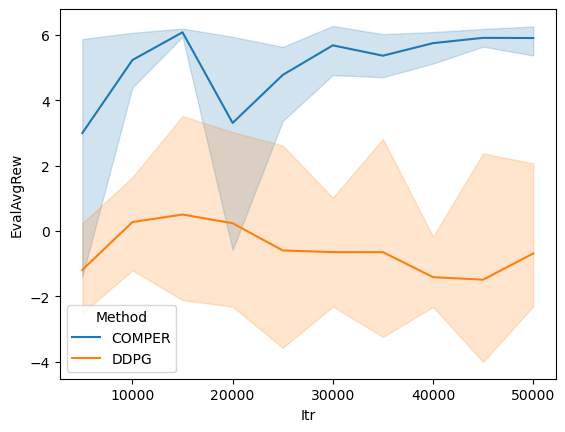

In [ ]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [ ]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,149,166.795124,COMPER,95.299548
100,150,167.996730,COMPER,97.016247
101,151,169.187010,COMPER,98.754470
102,152,170.366155,COMPER,100.508666
103,153,171.534204,COMPER,102.267641


In [ ]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,234,227.421336,DDPG,128.308962
100,235,229.222905,DDPG,130.289517
101,236,230.976458,DDPG,132.287020
102,237,232.864619,DDPG,134.301544
103,238,234.174679,DDPG,136.325213


In [ ]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,149,166.795124,COMPER,95.299548
100,150,167.996730,COMPER,97.016247
101,151,169.187010,COMPER,98.754470
102,152,170.366155,COMPER,100.508666
103,153,171.534204,COMPER,102.267641


In [ ]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
44581,49996,1008.059262,DDPG,958.835639
44582,49997,1009.061246,DDPG,959.831012
44583,49998,1010.063706,DDPG,960.826549
44584,49999,1011.065471,DDPG,961.822244
44585,50000,1012.064939,DDPG,962.818071


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

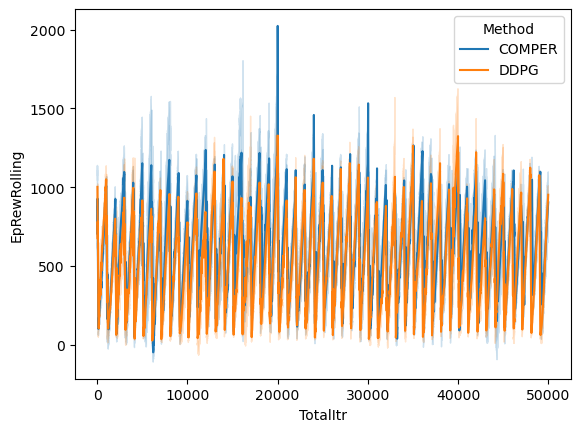

In [ ]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [ ]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,6.155324,COMPER,5.907082
2,15000,6.192832,COMPER,6.174078
3,20000,3.553240,COMPER,4.873036
4,25000,5.213922,COMPER,4.383581
5,30000,6.149561,COMPER,5.681742


In [ ]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,2.544492,DDPG,1.802091
2,15000,0.538726,DDPG,1.541609
3,20000,1.109204,DDPG,0.823965
4,25000,5.543812,DDPG,3.326508
5,30000,-2.329887,DDPG,1.606962


<Axes: xlabel='Int', ylabel='EpRewRolling'>

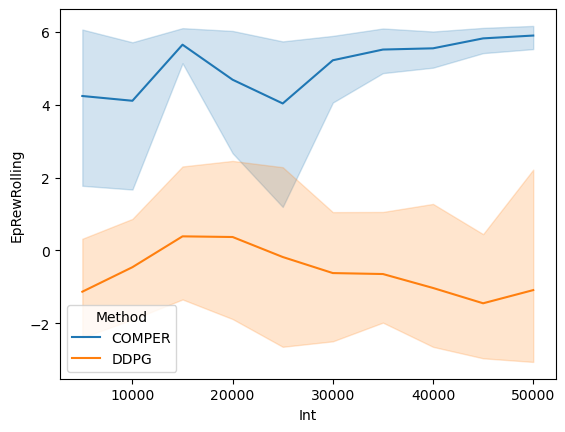

In [ ]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

In [ ]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

In [ ]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)